# Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import re 
import string
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score

import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [2]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv('dataset.csv')
data.head()

,text_type,text
0,spam,naturally irresistible your corporate identity...
1,spam,the stock trading gunslinger fanny is merrill ...
2,spam,unbelievable new homes made easy im wanting to...
3,spam,4 color printing special request additional in...
4,spam,do not have money get software cds from here s...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20348 entries, 0 to 20347
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text_type  20348 non-null  object
 1   text       20348 non-null  object
dtypes: object(2)
memory usage: 318.1+ KB


# Clean Data

In [4]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word in string.ascii_letters or word in string.whitespace])
    tokens = re.split('\W+', text)
    text = " ".join(ps.stem(word) for word in tokens if word not in stopwords)
    return text

In [5]:
data['cleaned_text'] = data['text'].apply(lambda x: clean_text(x))
data.head()

,text_type,text,cleaned_text
0,spam,naturally irresistible your corporate identity...,natur irresist corpor ident lt realli hard rec...
1,spam,the stock trading gunslinger fanny is merrill ...,stock trade gunsling fanni merril muzo colza a...
2,spam,unbelievable new homes made easy im wanting to...,unbeliev new home made easi im want show homeo...
3,spam,4 color printing special request additional in...,color print special request addit inform clic...
4,spam,do not have money get software cds from here s...,money get softwar cd softwar compat great grow...


# TF-IDF

In [6]:
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(data['cleaned_text'])

print(X_tfidf.shape)

(20348, 38271)


In [7]:
print(tfidf_vect.get_feature_names_out()[-100:-1])

['zlotowkach' 'zlotych' 'zlozyli' 'zlu' 'zmail' 'zmian' 'zmienilo' 'zmin'
 'zmsx' 'znac' 'znacza' 'znaczni' 'znajomych' 'znalazlam' 'znalezc'
 'znalezlismi' 'znam' 'znana' 'zndnioay' 'znow' 'zobaczeni' 'zodb'
 'zodiac' 'zoe' 'zofia' 'zogtoriu' 'zoko' 'zol' 'zoloftpain' 'zomato'
 'zombifi' 'zonal' 'zone' 'zonefil' 'zongo' 'zonlin' 'zoo' 'zoolant'
 'zoom' 'zoomabl' 'zope' 'zopl' 'zoppi' 'zor' 'zoraidaguerra' 'zorg'
 'zorganizowalem' 'zorunda' 'zosta' 'zostal' 'zou' 'zouk' 'zowi' 'zra'
 'zrobic' 'zrobilem' 'zroor' 'zs' 'zsh' 'zsyn' 'zt' 'ztqi'
 'ztvncxxabivsiclasstypeinfo' 'ztvwo' 'zu' 'zufferli' 'zugang' 'zuid'
 'zulf' 'zuli' 'zulkifli' 'zum' 'zuma' 'zungenakrobatik' 'zurcklt'
 'zurich' 'zustand' 'zustellstatu' 'zuyw' 'zvao' 'zwischen' 'zwlaszcza'
 'zwwyw' 'zwzm' 'zyada' 'zyadabor' 'zyban' 'zyc' 'zygalski' 'zygoma' 'zyi'
 'zymg' 'zyrzvnmg' 'zyxel' 'zzmacmac' 'zzmp' 'zzzlist' 'zzzz' 'zzzzcc']


In [8]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names_out()
X_tfidf_df

,aa,aaa,aaaajaaaaooo,aaagaya,aab,aabhi,aac,aadat,aadhar,aaefcc,...,zyi,zymg,zyrzvnmg,zyxel,zzmacmac,zzmp,zzzlist,zzzz,zzzzcc,zzzzteana
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Random Forest

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_text'], data['text_type'], test_size=0.2)

In [10]:
tfidf_vect = TfidfVectorizer(dtype=np.float32)
tfidf_vect_fit = tfidf_vect.fit(X_train)

In [11]:
tfidf_train = tfidf_vect_fit.transform(X_train)
tfidf_test = tfidf_vect_fit.transform(X_test)

In [12]:
X_train_vect = pd.DataFrame(tfidf_train.toarray())
X_test_vect = pd.DataFrame(tfidf_test.toarray())

In [13]:
X_train_vect.head()

,0,1,2,3,4,5,6,7,8,9,...,33980,33981,33982,33983,33984,33985,33986,33987,33988,33989
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Grid Search

In [14]:
def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators = n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(X_train_vect, y_train)
    y_pred = rf_model.predict(X_test_vect)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')
    print('Est: {} / Depth: {} ----- Precision: {} / Recall: {} / Accuracy: {}'.format(
        n_est, depth, round(precision, 3), round(recall,3),
        round((y_pred==y_test).sum() / len(y_pred), 3)))

In [15]:
for n_est in [10, 50, 100, 150]:
    for depth in [10, 20, 30, None]:
        train_RF(n_est, depth)

Est: 10 / Depth: 10 ----- Precision: 0.986 / Recall: 0.122 / Accuracy: 0.746
Est: 10 / Depth: 20 ----- Precision: 0.968 / Recall: 0.339 / Accuracy: 0.806
Est: 10 / Depth: 30 ----- Precision: 0.959 / Recall: 0.435 / Accuracy: 0.831
Est: 10 / Depth: None ----- Precision: 0.825 / Recall: 0.783 / Accuracy: 0.889
Est: 50 / Depth: 10 ----- Precision: 1.0 / Recall: 0.059 / Accuracy: 0.728
Est: 50 / Depth: 20 ----- Precision: 0.986 / Recall: 0.296 / Accuracy: 0.796
Est: 50 / Depth: 30 ----- Precision: 0.99 / Recall: 0.435 / Accuracy: 0.836
Est: 50 / Depth: None ----- Precision: 0.829 / Recall: 0.844 / Accuracy: 0.905
Est: 100 / Depth: 10 ----- Precision: 1.0 / Recall: 0.057 / Accuracy: 0.728
Est: 100 / Depth: 20 ----- Precision: 0.993 / Recall: 0.254 / Accuracy: 0.784
Est: 100 / Depth: 30 ----- Precision: 0.989 / Recall: 0.45 / Accuracy: 0.84
Est: 100 / Depth: None ----- Precision: 0.837 / Recall: 0.855 / Accuracy: 0.91
Est: 150 / Depth: 10 ----- Precision: 0.982 / Recall: 0.048 / Accuracy: 0.

## Random Forest Spam Detection

In [16]:
rf = RandomForestClassifier(n_estimators=50, max_depth=None, n_jobs=-1)

rf_model = rf.fit(X_train_vect, y_train)
y_pred_rf = rf_model.predict(X_test_vect)

precision, recall, fscore, train_support = score(y_test, y_pred_rf, pos_label='spam', average='binary')
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
        round(precision, 3), round(recall, 3), round((y_pred_rf==y_test).sum() / len(y_pred_rf), 3 )))

Precision: 0.827 / Recall: 0.846 / Accuracy: 0.904


In [18]:
rf_df = pd.DataFrame([X_test, y_test]).transpose()
rf_df['pred'] = y_pred_rf

rf_df[rf_df['pred'] != rf_df['text_type']]

,cleaned_text,text_type,pred
18350,oshada otkan yili somdan oludik,ham,spam
10967,hello darl today would love chat dont tell loo...,spam,ham
1050,ciali offer freedom choos right moment get med...,spam,ham
17511,apolog doubt legitim compani paid huge im grea...,spam,ham
17906,cant thank elliotfin everyday share allow oppo...,spam,ham
...,...,...,...
18349,mg xanax qualiti pfizer press price sell last...,spam,ham
15798,teach,ham,spam
16601,special offr hdfcbank custom flat cashback boo...,spam,ham
13940,reticul spline,ham,spam


<Axes: xlabel='text_type', ylabel='count'>

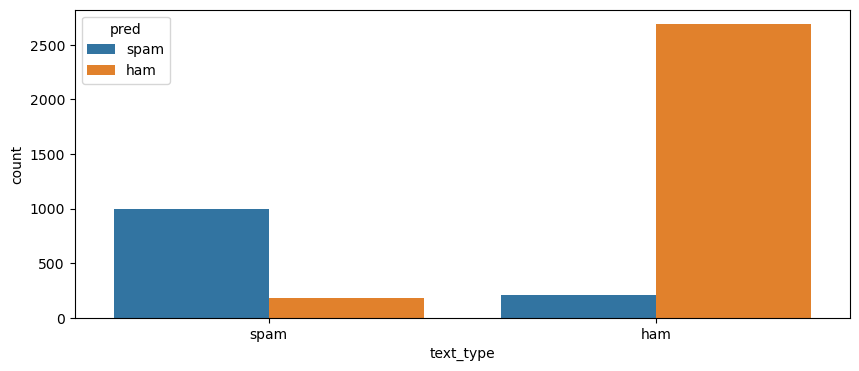

In [20]:
plt.figure(figsize=(10,4))
sns.countplot(data=rf_df, x='text_type', hue='pred')